In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [3]:
# Load the dataset
data = pd.read_csv("C:/Users/kaust/ML/MLPresentation/global_ai_ml_data_salaries.csv")
#Data Description
print(data.head(),"\n")  #Prints out first five row values
print(data.tail(),"\n")  #Prints out last five row values
print(data.shape,"\n")  #Prints out no of rows and columns
print(data.describe(),"\n")  
#Prints out the statistical data such as count,mean etc for data have integer values
print(data.info(),"\n")  
#Prints out the the column heads, the no of values it has stored along with the data type present
print(data.nunique(),"\n")  #Prints out the amount of data that is unique in each column

   work_year experience_level employment_type                 job_title  \
0       2024               MI              FT     Business Intelligence   
1       2024               MI              FT     Business Intelligence   
2       2024               SE              FT              BI Developer   
3       2024               SE              FT              BI Developer   
4       2024               SE              FT  Machine Learning Modeler   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   84021             USD          84021                 CA             0   
1   69000             USD          69000                 CA             0   
2  241600             USD         241600                 US             0   
3  109800             USD         109800                 US             0   
4  245400             USD         245400                 US           100   

  company_location company_size  
0               CA            M  
1               CA

In [6]:
print(data.isnull().sum(),"\n") #Prints out missing values of data 
numeric_columns = data.select_dtypes(include=[np.number]).columns 
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns 
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean()) 
# Fill numeric columns with their mean 
print(data.duplicated().sum(),"\n") #Prints out duplicated values 
categorical_columns = data.select_dtypes(include=[object]).columns 
le = LabelEncoder() 
for col in categorical_columns: 
    data[col] = le.fit_transform(data[col]) 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64 

8261 



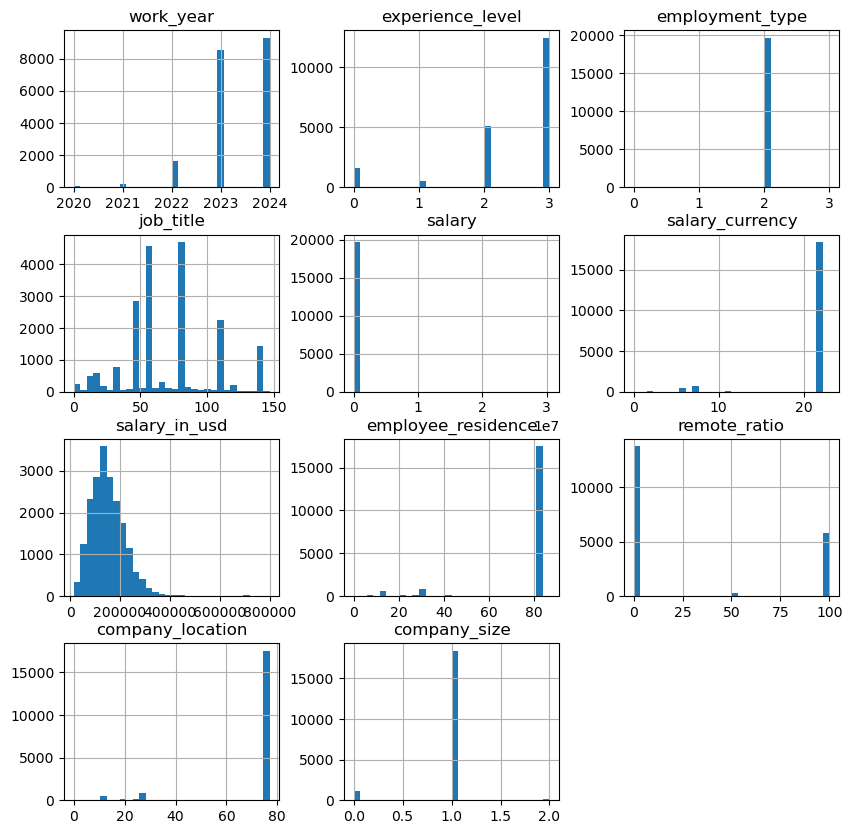

C:\Users\kaust\AppData\Local\Temp\ipykernel_70360\1530468675.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


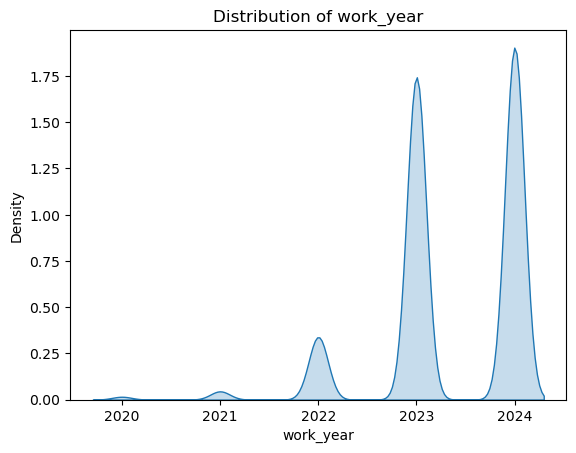

C:\Users\kaust\AppData\Local\Temp\ipykernel_70360\1530468675.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


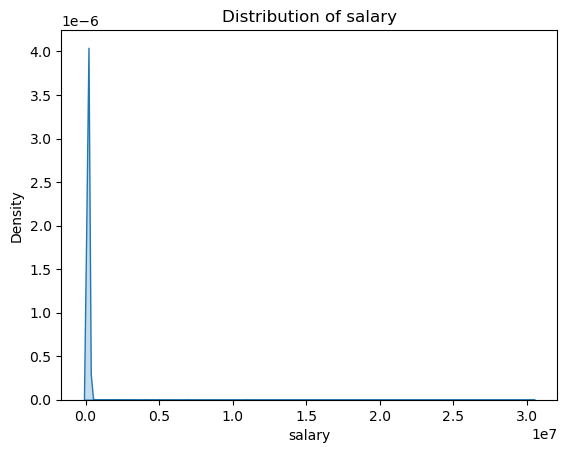

C:\Users\kaust\AppData\Local\Temp\ipykernel_70360\1530468675.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


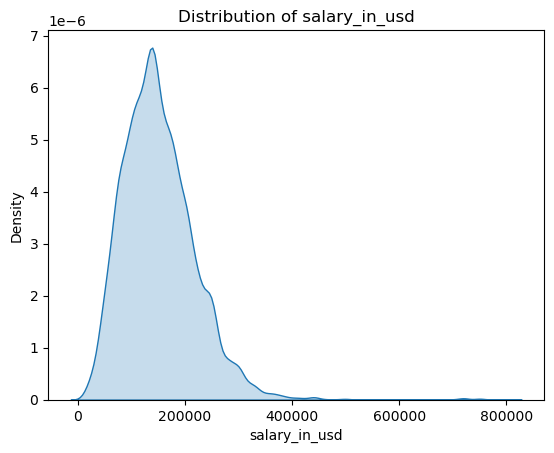

C:\Users\kaust\AppData\Local\Temp\ipykernel_70360\1530468675.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


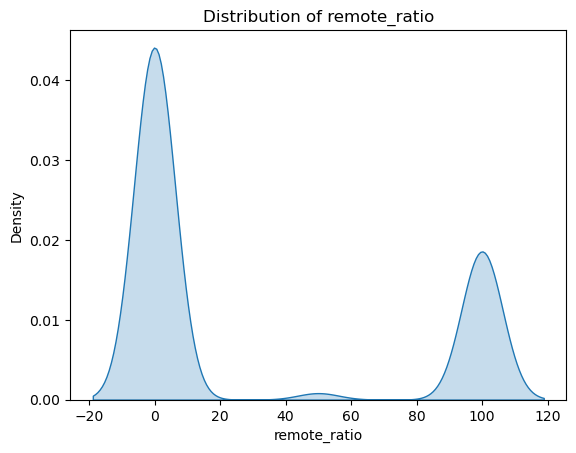

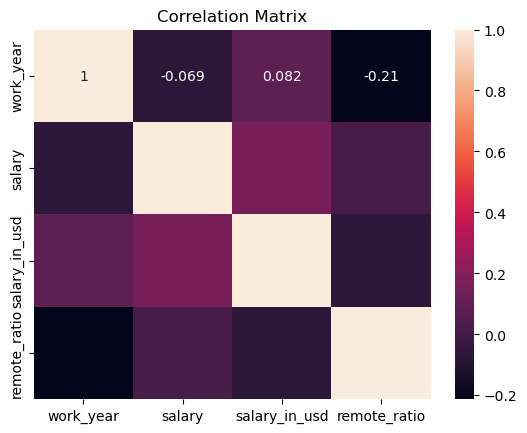

C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

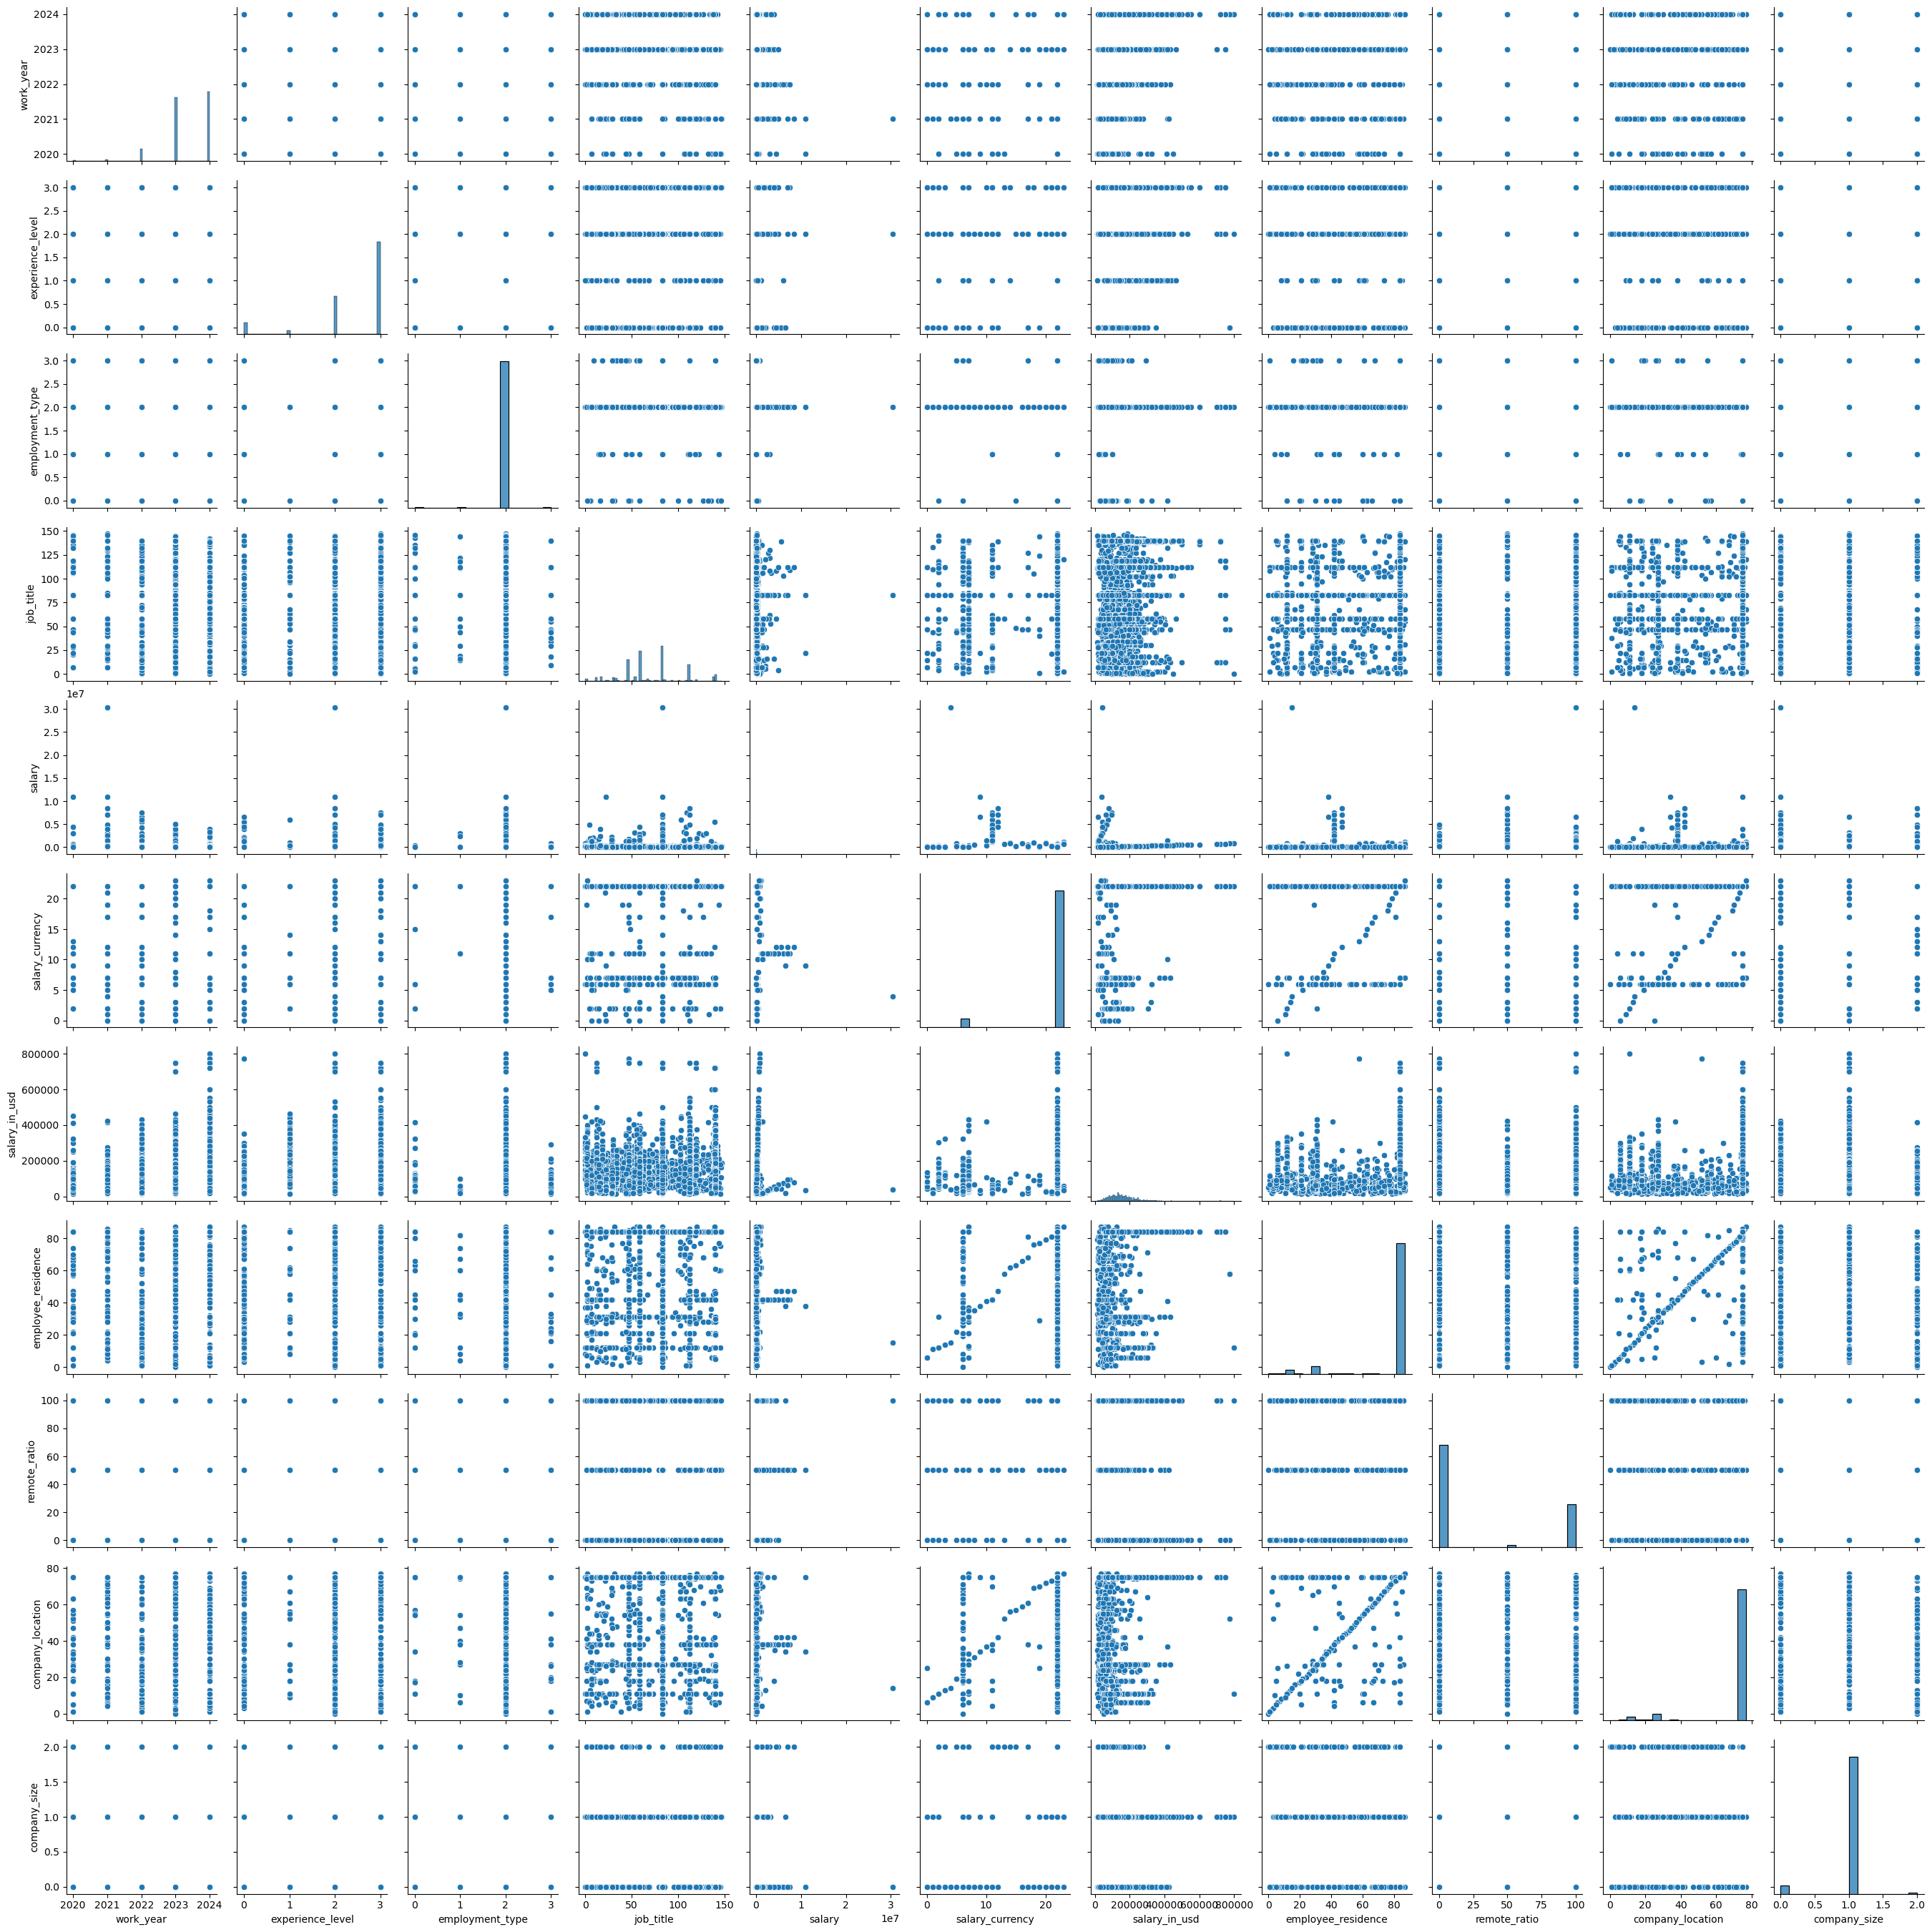

In [7]:
#Data Visualization
data.hist(bins=30, figsize=(10, 10))
plt.show()  #Prints out histogram of data
for column in numeric_columns:
    sns.kdeplot(data[column], shade=True)
    plt.title(f'Distribution of {column}')
    plt.show()  #Prints out KDE Plots
numeric_data = data[numeric_columns]
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns,
yticklabels=correlation_matrix.columns,annot=True)
plt.title('Correlation Matrix')
plt.show()  #Prints out a heatmap by using correlation matrix
# Explores data
sns.pairplot(data)
plt.show()

In [8]:
#Data Testing and preprocessing
X=data.drop('salary',axis=1) #This is the feature matrix and it contains all the independent variables needed for model training, excluding the target variable.
y=data['salary']  #This is the target variable which will be used as dependent variable for the machine learning model.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)
sc_X=StandardScaler()   #Used to standardize data by making mean=0 and standard deviation=1
X_train=sc_X.fit_transform(X_train) #Method used to do the standardization
X_test=sc_X.transform(X_test)  #Secondary method
print(X_train,"\n") #Used to print out the standardized data
print(X_test)
# Selects only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

[[-0.49541184  0.63352107  0.01494919 ... -0.65460647  0.34064834
   0.19425164]
 [ 0.90549212  0.63352107  0.01494919 ... -0.65460647  0.34064834
   0.19425164]
 [-0.49541184  0.63352107  0.01494919 ... -0.65460647 -2.54784655
   0.19425164]
 ...
 [-0.49541184 -0.47914989  0.01494919 ...  1.55247207  0.34064834
   0.19425164]
 [-0.49541184 -2.70449181  0.01494919 ... -0.65460647  0.34064834
   0.19425164]
 [ 0.90549212  0.63352107  0.01494919 ... -0.65460647  0.34064834
   0.19425164]] 

[[-0.49541184 -1.59182085  0.01494919 ... -0.65460647  0.34064834
   0.19425164]
 [-0.49541184  0.63352107  0.01494919 ... -0.65460647  0.34064834
   0.19425164]
 [-0.49541184  0.63352107  0.01494919 ... -0.65460647  0.34064834
   0.19425164]
 ...
 [-1.89631579 -1.59182085  0.01494919 ...  1.55247207  0.34064834
   0.19425164]
 [ 0.90549212  0.63352107  0.01494919 ... -0.65460647  0.34064834
   0.19425164]
 [-0.49541184  0.63352107  0.01494919 ... -0.65460647  0.34064834
   0.19425164]]


Mean Squared Error: 52714727347.57942
R-squared Score: 0.07584134406064946


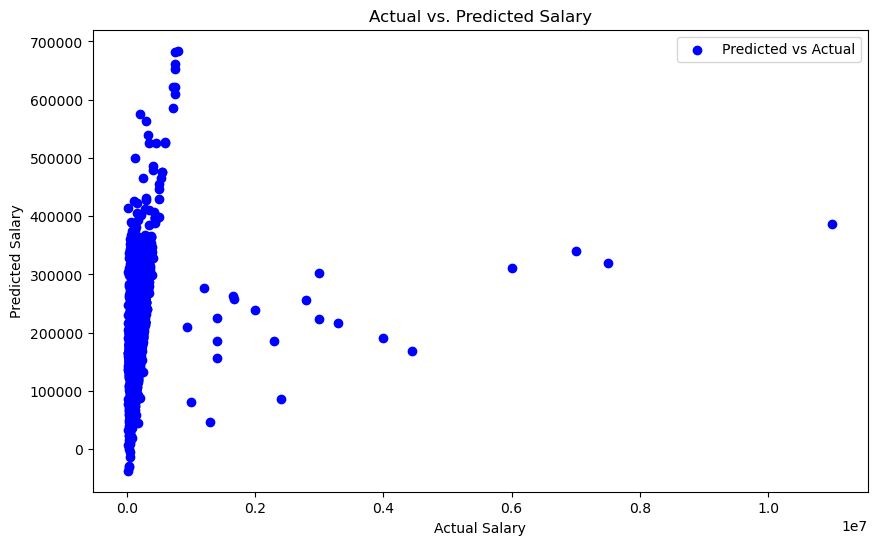

In [10]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction on the test set
y_pred_linR = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linR)
r2 = r2_score(y_test, y_pred_linR)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Visualization - Actual vs. Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_linR, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.legend()
plt.show()


In [ ]:
# Training the Logistic Regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logR = LogisticRegression(max_iter=500, random_state=0)
logR.fit(X_train_scaled, y_train)
# Prediction on the test set
y_pred_logR = logR.predict(X_test)
# Evaluation - Accuracy for Classification
accuracy_logR = accuracy_score(y_test, y_pred_logR)
print("Accuracy of Logistic Regression:", accuracy_logR)